In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
tqdm.pandas()

import ast
import json
import os
import math
import string
import re

from itertools import combinations
from scipy.stats import kendalltau, spearmanr
import rbo

# 1. Human correlation

In [2]:
batch_pilot = '../batches/AMT/batch_pilot.csv'
batch_mid_1 = '../batches/AMT/batch_mid_1.csv'
batch_mid_2 = '../batches/AMT/batch_mid_2.csv'
batch_final_1 = '../batches/AMT/batch_final_1.csv'
batch_final_2= '../batches/AMT/batch_final_2.csv'

In [3]:
batch_pilot_2nd = '../batches/AMT/batch_pilot_2nd.csv'
batch_mid_1_2nd = '../batches/AMT/batch_mid_1_2nd.csv'
batch_mid_2_2nd = '../batches/AMT/batch_mid_2_2nd.csv'
batch_final_1_2nd = '../batches/AMT/batch_final_1_2nd.csv'
batch_final_2_2nd = '../batches/AMT/batch_final_2_2nd.csv'

In [4]:
def convert_amt_to_df(batch_path):

    d = pd.read_csv(batch_path)
    d = d[['AssignmentId', 'WorkerId', 'Answer.taskAnswers', 'SubmitTime', 'WorkTimeInSeconds']]
    d['WorkTime_min'] = d['WorkTimeInSeconds']/60
    d = d[['AssignmentId', 'WorkerId', 'Answer.taskAnswers', 'SubmitTime','WorkTime_min']]

    return d

In [5]:
df_pilot = convert_amt_to_df(batch_pilot)
df_mid1 = convert_amt_to_df(batch_mid_1)
df_mid2 = convert_amt_to_df(batch_mid_2)
df_final1 = convert_amt_to_df(batch_final_1)
df_final2 = convert_amt_to_df(batch_final_2)

In [6]:
df_pilot_2 = convert_amt_to_df(batch_pilot_2nd)
df_mid1_2 = convert_amt_to_df(batch_mid_1_2nd)
df_mid2_2 = convert_amt_to_df(batch_mid_2_2nd)
df_final1_2 = convert_amt_to_df(batch_final_1_2nd)
df_final2_2 = convert_amt_to_df(batch_final_2_2nd)

In [7]:
df_pilot.drop(4, inplace=True)

In [8]:
df_pilot_2 = df_pilot_2.loc[(df_pilot_2.WorkerId == 'AAHQAOHHLCBQE') | (df_pilot_2.WorkerId == 'A8L4X8QCFIKVZ')]

In [9]:
df_pilot_2

AssignmentId       WorkerId   
5  3QUO65DNQ4EC9GR9SJ8BV6RSAKLUOK  AAHQAOHHLCBQE  \
6  3XCC1ODXDV1NE0C8325AF0Z8IMXRQJ  A8L4X8QCFIKVZ   

                                  Answer.taskAnswers   
5  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  \
6  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   

                     SubmitTime  WorkTime_min  
5  Wed Sep 06 10:07:18 PDT 2023     30.516667  
6  Wed Sep 06 10:49:39 PDT 2023     88.100000

In [10]:
df_mid = df_pilot.merge(df_mid1[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_mid = df_mid.rename(columns={'Answer.taskAnswers_x':'pilot', 'Answer.taskAnswers_y':'mid1', 'WorkTime_min_x':'time_pilot', 'WorkTime_min_y':'time_mid1'})
df_mid = df_mid.merge(df_mid2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_mid = df_mid.rename(columns={'Answer.taskAnswers':'mid2', 'WorkTime_min':'time_mid2'})

df_all = df_mid.merge(df_final1[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_all = df_all.rename(columns={'Answer.taskAnswers':'final1', 'WorkTime_min':'time_final1'})
df_all = df_all.merge(df_final2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_all = df_all.rename(columns={'Answer.taskAnswers':'final2', 'WorkTime_min':'time_final2'})

df_all

AssignmentId        WorkerId   
0  339ANSOTRFSOAYBU0AR45MM8S6LKIJ  A1MUWHFRJIFF2E  \
1  3HFNH7HEMR4WPA3UNRBYGWL1CZLGQF  A1GKWKKKPD14LI   
2  3Q5ZZ9ZEVY5S39EEK1B7Q89CSM9583  A2PYR2H7X7AODL   
3  3TY7ZAOG5PAD33UEWK2YZIMC6ELK09  A1YAZDV0TK3CKY   

                                               pilot   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   

                     SubmitTime  time_pilot   
0  Fri Aug 11 11:51:04 PDT 2023    8.150000  \
1  Fri Aug 11 11:51:01 PDT 2023    8.483333   
2  Sat Aug 12 00:01:43 PDT 2023   52.733333   
3  Fri Aug 11 22:42:37 PDT 2023   63.366667   

                                                mid1   time_mid1   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   19.633333  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   19.866667   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   73.533333   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  110.150000   

                                                mid2  time_mid2   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  21.933333  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  21.766667   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  68.933333   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  72.316667   

                                              final1  time_final1   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    41.516667  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    31.683333   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   121.766667   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    71.450000   

                                              final2  time_final2  
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    28.433333  
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    38.283333  
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   135.816667  
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    70.250000

In [11]:
df_mid_2 = df_pilot_2.merge(df_mid1_2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_mid_2 = df_mid_2.rename(columns={'Answer.taskAnswers_x':'pilot', 'Answer.taskAnswers_y':'mid1', 'WorkTime_min_x':'time_pilot', 'WorkTime_min_y':'time_mid1'})
df_mid_2 = df_mid_2.merge(df_mid2_2[['WorkerId', 'Answer.taskAnswers','WorkTime_min' ]], how='left', on='WorkerId')
df_mid_2 = df_mid_2.rename(columns={'Answer.taskAnswers':'mid2', 'WorkTime_min':'time_mid2'})

df_all_2 = df_mid_2.merge(df_final1_2[['WorkerId', 'Answer.taskAnswers',  'WorkTime_min']], how='left', on='WorkerId')
df_all_2 = df_all_2.rename(columns={'Answer.taskAnswers':'final1', 'WorkTime_min':'time_final1'})
df_all_2 = df_all_2.merge(df_final2_2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_all_2 = df_all_2.rename(columns={'Answer.taskAnswers':'final2', 'WorkTime_min':'time_final2'})

df_all_2

AssignmentId       WorkerId   
0  3QUO65DNQ4EC9GR9SJ8BV6RSAKLUOK  AAHQAOHHLCBQE  \
1  3XCC1ODXDV1NE0C8325AF0Z8IMXRQJ  A8L4X8QCFIKVZ   

                                               pilot   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   

                     SubmitTime  time_pilot   
0  Wed Sep 06 10:07:18 PDT 2023   30.516667  \
1  Wed Sep 06 10:49:39 PDT 2023   88.100000   

                                                mid1  time_mid1   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  73.383333  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  36.200000   

                                                mid2  time_mid2   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...      37.65  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...      63.25   

                                              final1  time_final1   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    71.266667  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   103.350000   

                                              final2  time_final2  
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    29.233333  
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   134.266667

In [12]:
df_all = pd.concat([df_all, df_all_2]) # concat first four amt with the last two amt workers

In [13]:
df_all = df_all.reset_index(drop=True)

In [14]:
df_all

AssignmentId        WorkerId   
0  339ANSOTRFSOAYBU0AR45MM8S6LKIJ  A1MUWHFRJIFF2E  \
1  3HFNH7HEMR4WPA3UNRBYGWL1CZLGQF  A1GKWKKKPD14LI   
2  3Q5ZZ9ZEVY5S39EEK1B7Q89CSM9583  A2PYR2H7X7AODL   
3  3TY7ZAOG5PAD33UEWK2YZIMC6ELK09  A1YAZDV0TK3CKY   
4  3QUO65DNQ4EC9GR9SJ8BV6RSAKLUOK   AAHQAOHHLCBQE   
5  3XCC1ODXDV1NE0C8325AF0Z8IMXRQJ   A8L4X8QCFIKVZ   

                                               pilot   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   
4  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   
5  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   

                     SubmitTime  time_pilot   
0  Fri Aug 11 11:51:04 PDT 2023    8.150000  \
1  Fri Aug 11 11:51:01 PDT 2023    8.483333   
2  Sat Aug 12 00:01:43 PDT 2023   52.733333   
3  Fri Aug 11 22:42:37 PDT 2023   63.366667   
4  Wed Sep 06 10:07:18 PDT 2023   30.516667   
5  Wed Sep 06 10:49:39 PDT 2023   88.100000   

                                                mid1   time_mid1   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   19.633333  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   19.866667   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   73.533333   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  110.150000   
4  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   73.383333   
5  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   36.200000   

                                                mid2  time_mid2   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  21.933333  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  21.766667   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  68.933333   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  72.316667   
4  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  37.650000   
5  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...  63.250000   

                                              final1  time_final1   
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    41.516667  \
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    31.683333   
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   121.766667   
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    71.450000   
4  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    71.266667   
5  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   103.350000   

                                              final2  time_final2  
0  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    28.433333  
1  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    38.283333  
2  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   135.816667  
3  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    70.250000  
4  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...    29.233333  
5  [{"amt_output_toy":"[{\"exampleIndex\":0,\"met...   134.266667

Average Time to complete

In [15]:
np.mean(((df_all.time_pilot.values) + (df_all.time_mid1.values) + + (df_all.time_mid2.values) + (df_all.time_final1.values) + (df_all.time_final2.values))/50)

5.824277777777778

In [15]:
def parse_amt_answers(pd_answer):

    input_string = pd_answer

    # Convert the string to a list of dictionaries
    list_of_dicts = json.loads(input_string)

    # The inner JSON string is still escaped, so we need to parse it again
    inner_json_str = list_of_dicts[0]["amt_output_toy"]
    inner_list_of_dicts = json.loads(inner_json_str)

    # Update the outer dictionary with the processed inner list
    list_of_dicts[0]["amt_output_toy"] = inner_list_of_dicts

    # Print the final result as a Python dictionary
    result_dict = list_of_dicts[0]['amt_output_toy']

    return result_dict

In [16]:
def combine_outputs_by_annotator(annot_idx):

    rounds = ['pilot', 'mid1', 'mid2', 'final1', 'final2']
    df = pd.DataFrame()
    for round in rounds:
        A = parse_amt_answers(df_all[round][annot_idx])
                
        # Extract the 'exampleIndex' and 'methods' lists from each dictionary
        example_indices = [item['exampleIndex'] for item in A]
        # methods_lists = [item['methods'] for item in A]
        methods_lists = [[method for method in item['methods'] if method != 'black-bar'] for item in A]

        # Create a DataFrame
        df = pd.concat([df, pd.DataFrame(methods_lists, index=example_indices, columns=['rank_{}'.format(i) for i in range(1, len(methods_lists[0]) + 1)])]).reset_index(drop=True)

    # Convert system to corresponding model name
    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)
    for idx, examples in enumerate(model_info):
        systems_lst = list(examples.values())
        model_lst = list(examples.keys())
        for column in df.columns:
            if df.at[idx, column] in systems_lst:
                corr_model_idx = systems_lst.index(df.at[idx, column])
                df.at[idx, column] = model_lst[corr_model_idx]
    
    df.to_csv('../batches/AMT/model_annot{}.csv'.format(annot_idx), index=False)
    return df

In [17]:
annot_0 = combine_outputs_by_annotator(0)
annot_1 = combine_outputs_by_annotator(1)
annot_2 = combine_outputs_by_annotator(2)
annot_3 = combine_outputs_by_annotator(3)
annot_4 = combine_outputs_by_annotator(4)
annot_5 = combine_outputs_by_annotator(5)

In [18]:
annot_0.head()

rank_1     rank_2    rank_3   rank_4  rank_5       rank_6       rank_7   
0   vicuna      baize  wizardlm     gpt4  cohere  instructgpt      chatgpt  \
1    baize  redpajama     llama      mpt  vicuna        koala     wizardlm   
2    baize   wizardlm      gpt4   falcon  vicuna        koala      chatgpt   
3  chatgpt       gpt4    vicuna    baize   koala     wizardlm  instructgpt   
4    baize      koala  wizardlm  chatgpt  cohere         gpt4       vicuna   

        rank_8       rank_9     rank_10     rank_11    rank_12      rank_13   
0        dolly        koala         mpt  openassist  redpajama        llama  \
1      chatgpt  instructgpt        gpt4      cohere      dolly   openassist   
2  instructgpt       cohere       dolly  openassist  redpajama          mpt   
3       cohere        dolly  openassist   redpajama        mpt       alpaca   
4   openassist        dolly      alpaca         mpt     falcon  instructgpt   

     rank_14 rank_15  
0     alpaca  falcon  
1     alpaca  falcon  
2     alpaca   llama  
3     falcon   llama  
4  redpajama   llama

In [20]:
annot_1.head()

rank_1   rank_2     rank_3    rank_4  rank_5    rank_6       rank_7   
0    vicuna     gpt4      baize   chatgpt   koala  wizardlm        dolly  \
1     baize      mpt  redpajama     llama  vicuna     koala     wizardlm   
2  wizardlm     gpt4      baize    falcon  vicuna     koala      chatgpt   
3      gpt4  chatgpt     vicuna     baize   koala  wizardlm  instructgpt   
4    vicuna    baize      koala  wizardlm    gpt4   chatgpt       cohere   

        rank_8       rank_9      rank_10     rank_11    rank_12      rank_13   
0       cohere          mpt  instructgpt  openassist  redpajama       alpaca  \
1      chatgpt  instructgpt         gpt4      cohere      dolly   openassist   
2  instructgpt       cohere        dolly  openassist  redpajama          mpt   
3       cohere        dolly   openassist   redpajama        mpt       alpaca   
4        dolly   openassist       alpaca         mpt     falcon  instructgpt   

     rank_14 rank_15  
0     falcon   llama  
1     alpaca  falcon  
2     alpaca   llama  
3     falcon   llama  
4  redpajama   llama

In [21]:
annot_5.head()

rank_1   rank_2       rank_3      rank_4       rank_5      rank_6   
0  chatgpt   cohere         gpt4      alpaca  instructgpt      vicuna  \
1     gpt4    baize        koala    wizardlm      chatgpt      vicuna   
2   vicuna    baize  instructgpt        gpt4        koala  openassist   
3    baize   vicuna        koala    wizardlm      chatgpt        gpt4   
4    baize  chatgpt  instructgpt  openassist     wizardlm        gpt4   

        rank_7      rank_8      rank_9 rank_10      rank_11 rank_12   
0        baize       koala    wizardlm   dolly    redpajama     mpt  \
1  instructgpt  openassist       dolly  cohere    redpajama  falcon   
2     wizardlm      cohere     chatgpt     mpt    redpajama  alpaca   
3       cohere       dolly  openassist     mpt  instructgpt  falcon   
4       vicuna         mpt       koala  alpaca       cohere   dolly   

     rank_13 rank_14     rank_15  
0     falcon   llama  openassist  
1      llama  alpaca         mpt  
2      dolly   llama      falcon  
3  redpajama  alpaca       llama  
4  redpajama  falcon       llama

In [22]:
def compute_pairwise_counts(df, annot_idx):
    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)

    f.close()

    models = list(model_info[0].keys()) # a list of all LLM names (15)
    model_pairs = list(combinations(models, 2))
    default_value = 0
    all_count_dicts = []

    with open('human_annotations/annot_{}.json'.format(annot_idx), 'w') as j:

        for idx in tqdm(range(df.shape[0])):
            count_dict = dict.fromkeys(models, default_value)
            annot_example = df.loc[idx].values
            for i, pair in enumerate(model_pairs):
                if np.where(annot_example == pair[0]) < np.where(annot_example == pair[1]):
                    count_dict[pair[0]] += 1
                else:
                    count_dict[pair[1]] += 1
            all_count_dicts.append(count_dict)
        
        json.dump(all_count_dicts, j, indent=4)

    j.close()

In [23]:
compute_pairwise_counts(annot_0, 1)
compute_pairwise_counts(annot_1, 2)
compute_pairwise_counts(annot_2, 3)
compute_pairwise_counts(annot_3, 4)
compute_pairwise_counts(annot_4, 5)
compute_pairwise_counts(annot_5, 6)

100%|██████████| 50/50 [00:00<00:00, 1544.12it/s]


## Inter-annotator agreement

Kendall's Tau

In [24]:
def compute_kendall_tau(annotator_matrices_x, annotator_matrices_y, num_x, num_y):
    agreement_scores = []
    tau_matrix = np.zeros((num_x, num_y))
    sig_matrix = np.zeros((num_x, num_y))

    for i in range(num_x):
        for j in range(i+1, num_y):
            # pairs_annotator_i = [pair for row in annotator_matrices_x[i] for pair in combinations(row, 2)]
            # pairs_annotator_j = [pair for row in annotator_matrices_y[j] for pair in combinations(row, 2)]
            pairs_annotator_i = [item for row in annotator_matrices_x[i] for item in row]
            pairs_annotator_j = [item for row in annotator_matrices_y[j] for item in row]
            
            tau, sig = kendalltau(pairs_annotator_i, pairs_annotator_j, variant='b')
            # tau, sig = kendalltau(pairs_i_5, pairs_j_5, variant='b')
            tau = round(tau, 3)
            # sig = round(sig, 3)
            agreement_scores.append(tau)

            tau_matrix[i, j] = tau
            tau_matrix[j, i] = tau  # Since it's symmetric

            # sig_matrix[i, j] = sig
            # sig_matrix[j, i] = sig  # Since it's symmetric

    # Calculate the average agreement score
    average_agreement = sum(agreement_scores) / len(agreement_scores)
    print(f"Average Kendall's Tau-b: {average_agreement:.2f}")

    print("Pairwise Kendall's Tau-b Matrix:")
    print(tau_matrix)
    print("Statistical Significance")
    # print(sig_matrix)

    # return pd.DataFrame(tau_matrix).to_csv('../batches/corr_output.csv', index=False, header=False)

In [25]:
compute_kendall_tau([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], 
[annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], 6,6)

Average Kendall's Tau-b: 0.06
Pairwise Kendall's Tau-b Matrix:
[[ 0.     0.389  0.048  0.06   0.    -0.004]
 [ 0.389  0.     0.005  0.021  0.018  0.004]
 [ 0.048  0.005  0.     0.088  0.057  0.036]
 [ 0.06   0.021  0.088  0.     0.111  0.032]
 [ 0.     0.018  0.057  0.111  0.     0.031]
 [-0.004  0.004  0.036  0.032  0.031  0.   ]]
Statistical Significance


Spearman's correlation

In [26]:
def compute_spearman_corr(annotator_matrices_x, annotator_matrices_y, num_x, num_y):

    correlation_matrix = np.zeros((num_x, num_y))
    sig_matrix = np.zeros((num_x, num_y))

    for i in range(num_x):
        for j in range(i+1, num_y):
            flat_annotator_i = [item for sublist in annotator_matrices_x[i] for item in sublist]
            flat_annotator_j = [item for sublist in annotator_matrices_y[j] for item in sublist]
            
            correlation, sig = spearmanr(flat_annotator_i, flat_annotator_j)
            correlation = round(correlation, 3)
            sig = round(sig, 3)
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation  # Since it's symmetric
            
            sig_matrix[i, j] = sig
            sig_matrix[j, i] = sig  # Since it's symmetric


    print("Pairwise Spearman's Rank Correlation Matrix:")
    print(correlation_matrix)
    print("Significance")
    print(sig_matrix)
    
    # return pd.DataFrame(correlation_matrix).to_csv('../batches/corr_output.csv', index=False, header=False)

In [27]:
compute_spearman_corr([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], 
[annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], 6,6)

Pairwise Spearman's Rank Correlation Matrix:
[[ 0.     0.449  0.067  0.084 -0.005 -0.007]
 [ 0.449  0.     0.006  0.03   0.019  0.003]
 [ 0.067  0.006  0.     0.114  0.073  0.052]
 [ 0.084  0.03   0.114  0.     0.147  0.044]
 [-0.005  0.019  0.073  0.147  0.     0.044]
 [-0.007  0.003  0.052  0.044  0.044  0.   ]]
Significance
[[0.    0.    0.066 0.022 0.896 0.856]
 [0.    0.    0.865 0.416 0.601 0.932]
 [0.066 0.865 0.    0.002 0.047 0.157]
 [0.022 0.416 0.002 0.    0.    0.227]
 [0.896 0.601 0.047 0.    0.    0.231]
 [0.856 0.932 0.157 0.227 0.231 0.   ]]


Top-k similarity with RBO scores (k=5)

In [28]:
def compute_rbo_similarity(annotator_matrices_x, annotator_matrices_y, num_x, num_y, k): #rbo 
    rbo_matrix = np.zeros((num_x, num_y))

    avg_iaa_lst = []
    for i in range(num_x): # num on x-axis
        for j in range(i+1, num_y): # num on y-axis   
            flat_annotator_i = [sublist for sublist in annotator_matrices_x[i]]
            flat_annotator_j = [sublist for sublist in annotator_matrices_y[j]]
            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(flat_annotator_i, flat_annotator_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)
            rbo_matrix[i, j] = avg_rbo
            if avg_rbo != 1:
                avg_iaa_lst.append(avg_rbo)

    avg_iaa = sum(avg_iaa_lst)/len(avg_iaa_lst)

    print("Pairwise Rank-biased Overlap Matrix: ")
    print("Average IAA scores: ", avg_iaa)
    print(rbo_matrix)
    return avg_iaa

In [29]:
compute_rbo_similarity([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], 
[annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], 6,6, 15)

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4778666666666666
[[0.    0.636 0.408 0.413 0.44  0.414]
 [0.    0.    0.41  0.43  0.45  0.438]
 [0.    0.    0.    0.526 0.544 0.492]
 [0.    0.    0.    0.    0.55  0.472]
 [0.    0.    0.    0.    0.    0.545]
 [0.    0.    0.    0.    0.    0.   ]]


0.4778666666666666

### Combination Search

In [30]:
def find_highest_iaa(annot_lists, num_comb):
    
    # combination of models 
    best_comb = None 
    best_iaa = 0
    best_k = 0
    all_annot_idx = [0, 1, 2, 3, 4, 5]
    for comb_annot in combinations(all_annot_idx, num_comb):
        print(f"Combinations: {comb_annot}")
        annot_lst = []
        for annot_idx in comb_annot:
            annot_lst.append(annot_lists[annot_idx])
        
        # run rbo similarity with different k
        for k in range(1, 16):
            avg_rbo = compute_rbo_similarity(annot_lst, annot_lst, len(annot_lst), len(annot_lst), k)
            if avg_rbo > best_iaa:
                best_comb = comb_annot 
                best_iaa = avg_rbo
                best_k = k

    print(f"Best comb: {best_comb}")
    print(f"Best IAA: {best_iaa}")
    print(f"Best top k: {best_k}") 

        

In [31]:
annots = [annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values]

find_highest_iaa(annots, 2)

Combinations: (0, 1)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biase

In [32]:
find_highest_iaa(annots, 3)

Combinations: (0, 1, 2)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41

In [33]:
find_highest_iaa(annots, 4)

Combinations: (0, 1, 2, 3)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 


In [34]:
find_highest_iaa(annots, 5)

Combinations: (0, 1, 2, 3, 4)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.  

In [35]:
find_highest_iaa(annots, 6)

Combinations: (0, 1, 2, 3, 4, 5)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4778666666666666
[[0.    0.636 0.408 0.413 0.44  0.414]
 [0.    0.    0.41  0.43  0.45  0.438]
 [0.    0.    0.    0.526 0.544 0.492]
 [0.    0.    0.    0.    0.55  0.472]
 [0.    0.    0.    0.    0.    0.545]
 [0.    0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4778666666666666
[[0.    0.636 0.408 0.413 0.44  0.414]
 [0.    0.    0.41  0.43  0.45  0.438]
 [0.    0.    0.    0.526 0.544 0.492]
 [0.    0.    0.    0.    0.55  0.472]
 [0.    0.    0.    0.    0.    0.545]
 [0.    0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4778666666666666
[[0.    0.636 0.408 0.413 0.44  0.414]
 [0.    0.    0.41  0.43  0.45  0.438]
 [0.    0.    0.    0.526 0.544 0.492]
 [0.    0.    0.    0.    0.55  0.472]
 [0.    0.    0.    0.    0.    0.545]
 [0.    0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap

Old one (w/ only four workers)

In [36]:
# compute_rbo_similarity([annot_0.values, annot_1.values, annot_2.values, annot_3.values], 
# [annot_0.values, annot_1.values, annot_2.values, annot_3.values], 4,4)

## Model to Model correlation

In [30]:
with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
    model_info = json.load(f)

f.close()

model_rank_data = {}

model_names = list(model_info[0].keys()) 
for model in model_names:
    print('loading {}'.format(model))
    with open('model_annotations/nC2_preferences_{}.json'.format(model), 'r') as f:
        data = json.load(f)
    model_rank_data[model] = data

loading vicuna
loading baize
loading koala
loading wizardlm
loading chatgpt
loading instructgpt
loading gpt4
loading cohere
loading dolly
loading openassist
loading redpajama
loading mpt
loading alpaca
loading falcon
loading llama


In [32]:
model_rank_data

{'vicuna': [{'vicuna': 14,
   'baize': 13,
   'koala': 11,
   'wizardlm': 11,
   'chatgpt': 10,
   'instructgpt': 8,
   'gpt4': 6,
   'cohere': 6,
   'dolly': 4,
   'openassist': 2,
   'redpajama': 4,
   'mpt': 4,
   'alpaca': 4,
   'falcon': 2,
   'llama': 1},
  {'vicuna': 9,
   'baize': 13,
   'koala': 11,
   'wizardlm': 10,
   'chatgpt': 11,
   'instructgpt': 7,
   'gpt4': 6,
   'cohere': 6,
   'dolly': 4,
   'openassist': 6,
   'redpajama': 5,
   'mpt': 3,
   'alpaca': 6,
   'falcon': 3,
   'llama': 0},
  {'vicuna': 14,
   'baize': 9,
   'koala': 8,
   'wizardlm': 9,
   'chatgpt': 10,
   'instructgpt': 7,
   'gpt4': 8,
   'cohere': 8,
   'dolly': 5,
   'openassist': 7,
   'redpajama': 5,
   'mpt': 5,
   'alpaca': 3,
   'falcon': 2,
   'llama': 2},
  {'vicuna': 11,
   'baize': 11,
   'koala': 7,
   'wizardlm': 11,
   'chatgpt': 9,
   'instructgpt': 9,
   'gpt4': 9,
   'cohere': 8,
   'dolly': 6,
   'openassist': 7,
   'redpajama': 3,
   'mpt': 4,
   'alpaca': 4,
   'falcon': 1,
   '

In [38]:
sorted_rank_data = {}
for model, ranks in model_rank_data.items():
        sorted_model = [sorted(example_output, key=lambda x: (-example_output[x], x)) for example_output in ranks]
        sorted_rank_data[model] = sorted_model

In [39]:
compute_kendall_tau(list(sorted_rank_data.values()), list(sorted_rank_data.values()), 15, 15)

Average Kendall's Tau-b: 0.04
Pairwise Kendall's Tau-b Matrix:
[[ 0.    -0.012  0.032  0.025  0.069 -0.004 -0.051 -0.016 -0.006 -0.01
  -0.005 -0.017  0.007 -0.024  0.034]
 [-0.012  0.     0.027  0.165  0.01   0.048  0.021 -0.016  0.074  0.011
   0.033  0.01   0.078  0.024  0.014]
 [ 0.032  0.027  0.     0.051  0.031  0.062  0.064  0.03   0.078 -0.001
   0.067 -0.038  0.063  0.029  0.018]
 [ 0.025  0.165  0.051  0.     0.004  0.047  0.022 -0.013  0.057  0.004
   0.085 -0.021  0.025  0.039  0.032]
 [ 0.069  0.01   0.031  0.004  0.     0.087  0.085  0.054  0.131 -0.044
   0.071  0.007  0.024  0.082  0.059]
 [-0.004  0.048  0.062  0.047  0.087  0.     0.087  0.052  0.224  0.007
   0.1    0.023  0.099  0.008  0.039]
 [-0.051  0.021  0.064  0.022  0.085  0.087  0.     0.099  0.165 -0.016
   0.048 -0.019  0.087  0.011  0.037]
 [-0.016 -0.016  0.03  -0.013  0.054  0.052  0.099  0.     0.134 -0.04
   0.048  0.047  0.045  0.     0.048]
 [-0.006  0.074  0.078  0.057  0.131  0.224  0.165  0.134  

In [40]:
compute_spearman_corr(list(sorted_rank_data.values()), list(sorted_rank_data.values()), 15, 15)

Pairwise Spearman's Rank Correlation Matrix:
[[ 0.    -0.02   0.042  0.035  0.094 -0.008 -0.071 -0.024 -0.016 -0.016
  -0.008 -0.022  0.008 -0.036  0.047]
 [-0.02   0.     0.035  0.216  0.014  0.068  0.028 -0.022  0.11   0.013
   0.05   0.014  0.105  0.025  0.025]
 [ 0.042  0.035  0.     0.074  0.045  0.085  0.09   0.042  0.104 -0.002
   0.095 -0.052  0.083  0.04   0.023]
 [ 0.035  0.216  0.074  0.     0.004  0.064  0.03  -0.019  0.084  0.005
   0.119 -0.03   0.035  0.055  0.044]
 [ 0.094  0.014  0.045  0.004  0.     0.113  0.11   0.074  0.165 -0.064
   0.101  0.006  0.032  0.11   0.08 ]
 [-0.008  0.068  0.085  0.064  0.113  0.     0.12   0.069  0.303  0.01
   0.146  0.033  0.142  0.01   0.053]
 [-0.071  0.028  0.09   0.03   0.11   0.12   0.     0.14   0.239 -0.022
   0.07  -0.026  0.124  0.017  0.05 ]
 [-0.024 -0.022  0.042 -0.019  0.074  0.069  0.14   0.     0.175 -0.057
   0.069  0.065  0.064 -0.001  0.068]
 [-0.016  0.11   0.104  0.084  0.165  0.303  0.239  0.175  0.    -0.027
   0

In [41]:
model_rank_data

{'vicuna': [{'vicuna': 14,
   'baize': 13,
   'koala': 11,
   'wizardlm': 11,
   'chatgpt': 10,
   'instructgpt': 8,
   'gpt4': 6,
   'cohere': 6,
   'dolly': 4,
   'openassist': 2,
   'redpajama': 4,
   'mpt': 4,
   'alpaca': 4,
   'falcon': 2,
   'llama': 1},
  {'vicuna': 9,
   'baize': 13,
   'koala': 11,
   'wizardlm': 10,
   'chatgpt': 11,
   'instructgpt': 7,
   'gpt4': 6,
   'cohere': 6,
   'dolly': 4,
   'openassist': 6,
   'redpajama': 5,
   'mpt': 3,
   'alpaca': 6,
   'falcon': 3,
   'llama': 0},
  {'vicuna': 14,
   'baize': 9,
   'koala': 8,
   'wizardlm': 9,
   'chatgpt': 10,
   'instructgpt': 7,
   'gpt4': 8,
   'cohere': 8,
   'dolly': 5,
   'openassist': 7,
   'redpajama': 5,
   'mpt': 5,
   'alpaca': 3,
   'falcon': 2,
   'llama': 2},
  {'vicuna': 11,
   'baize': 11,
   'koala': 7,
   'wizardlm': 11,
   'chatgpt': 9,
   'instructgpt': 9,
   'gpt4': 9,
   'cohere': 8,
   'dolly': 6,
   'openassist': 7,
   'redpajama': 3,
   'mpt': 4,
   'alpaca': 4,
   'falcon': 1,
   '

In [42]:
def compute_rbo_machine_machine(model_ranked_data):
    all_models_ranking = []
    for model_name, rank_outputs in model_ranked_data.items():
        ranking_by_models = []
        for example_dict in rank_outputs:
            sorted_model = sorted(example_dict.keys(), key=lambda key: example_dict[key], reverse=True)
            ranking_by_models.append(sorted_model)

        all_models_ranking.append(ranking_by_models)

    rbo_matrix = np.zeros((15,15))
    for i in range(15):
        for j in range(15):
            model_i = all_models_ranking[i]
            model_j = all_models_ranking[j]
            print(f"model_i: {model_i}")
            print(f"model_j: {model_j}")
            print(model_i == model_j)
            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(model_i, model_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)
            rbo_matrix[i, j] = avg_rbo
            print('-------------------')

    print(rbo_matrix)
    return rbo_matrix

In [43]:
reordered_model_names = ['gpt4', 'chatgpt', 'instructgpt', 'llama', 'cohere', 'falcon', 'alpaca', 'vicuna', 'openassist', 'dolly', 'baize', 'koala', 'wizardlm', 'mpt', 'redpajama']
reordered_model_rank_data = {key: model_rank_data[key] for key in reordered_model_names}

model_to_model_rbo = pd.DataFrame(compute_rbo_machine_machine(reordered_model_rank_data))

model_i: [['gpt4', 'cohere', 'wizardlm', 'alpaca', 'instructgpt', 'koala', 'falcon', 'chatgpt', 'redpajama', 'baize', 'dolly', 'vicuna', 'openassist', 'llama', 'mpt'], ['gpt4', 'vicuna', 'baize', 'koala', 'wizardlm', 'chatgpt', 'instructgpt', 'cohere', 'falcon', 'openassist', 'dolly', 'redpajama', 'mpt', 'alpaca', 'llama'], ['chatgpt', 'gpt4', 'falcon', 'wizardlm', 'vicuna', 'baize', 'koala', 'cohere', 'instructgpt', 'redpajama', 'mpt', 'alpaca', 'llama', 'dolly', 'openassist'], ['chatgpt', 'gpt4', 'koala', 'wizardlm', 'alpaca', 'llama', 'mpt', 'falcon', 'baize', 'instructgpt', 'vicuna', 'cohere', 'dolly', 'openassist', 'redpajama'], ['baize', 'gpt4', 'alpaca', 'instructgpt', 'chatgpt', 'vicuna', 'wizardlm', 'dolly', 'cohere', 'falcon', 'openassist', 'koala', 'redpajama', 'mpt', 'llama'], ['gpt4', 'chatgpt', 'falcon', 'baize', 'openassist', 'instructgpt', 'mpt', 'cohere', 'alpaca', 'wizardlm', 'vicuna', 'dolly', 'koala', 'redpajama', 'llama'], ['chatgpt', 'gpt4', 'dolly', 'wizardlm', '

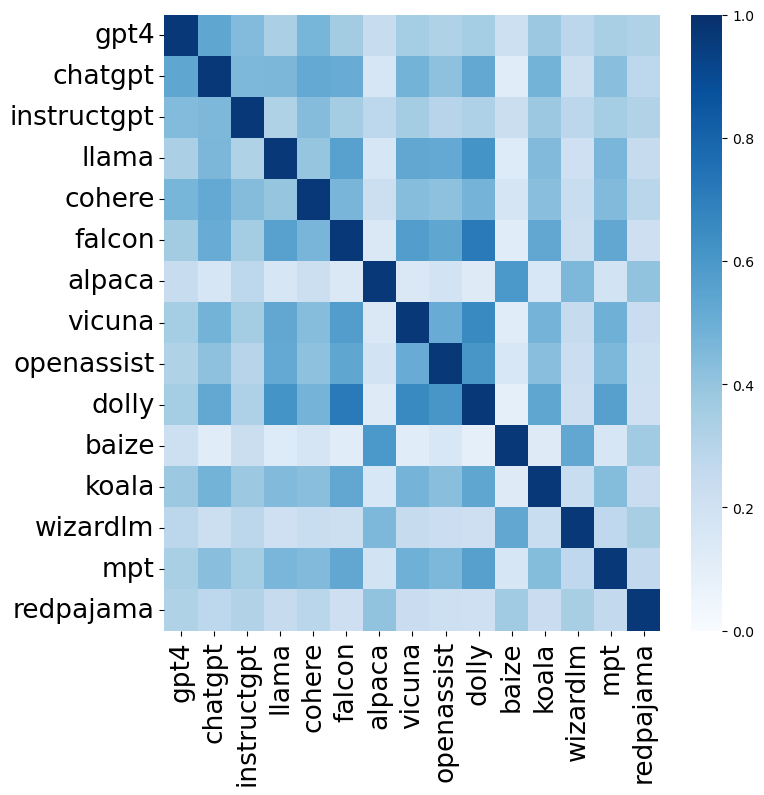

In [44]:
mask = np.triu(np.ones_like(model_to_model_rbo, dtype=bool))

plt.figure(figsize=(8,8))
sns.heatmap(model_to_model_rbo, fmt=".3f", cmap='Blues', xticklabels=reordered_model_names, yticklabels=reordered_model_names, vmax=1, vmin=0)
plt.tick_params(labelsize=19)
plt.xticks(rotation=90)
# plt.savefig('model_to_model.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Model - Human Correlation (Matrix)

In [45]:
np.array([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values]).shape

(6, 50, 15)

In [46]:
np.array(list(sorted_rank_data.values())).shape

(15, 50, 15)

In [47]:
def compute_kendall_tau_human_machine(annotator_matrices_x, annotator_matrices_y, num_x, num_y):
    agreement_scores = []
    tau_matrix = np.zeros((num_x, num_y))
    sig_matrix = np.zeros((num_x, num_y))

    for i in range(num_x):
        for j in range(num_y):
            pairs_annotator_i = [pair for row in annotator_matrices_x[i] for pair in combinations(row, 2)]
            pairs_annotator_j = [pair for row in annotator_matrices_y[j] for pair in combinations(row, 2)]
            
            tau, sig = kendalltau(pairs_annotator_i, pairs_annotator_j, variant='b')
            tau = round(tau, 3)
            sig = round(sig, 3)
            agreement_scores.append(tau)
            tau_matrix[i, j] = tau
            sig_matrix[i, j] = sig

    # Calculate the average agreement score
    average_agreement = sum(agreement_scores) / len(agreement_scores)
    print(f"Average Kendall's Tau-b: {average_agreement:.2f}")

    # print("Pairwise Kendall's Tau-b Matrix:")
    # print(tau_matrix)
    print("significance")
    print(sig_matrix)

    # return pd.DataFrame(tau_matrix).to_csv('../batches/corr_output.csv', index=False, header=False)

In [48]:
def compute_spearman_corr_human_machine(annotator_matrices_x, annotator_matrices_y, num_x, num_y):

    correlation_matrix = np.zeros((num_x, num_y))
    sig_matrix = np.zeros((num_x, num_y))

    for i in range(num_x):
        for j in range(num_y):
            flat_annotator_i = [item for sublist in annotator_matrices_x[i] for item in sublist]
            flat_annotator_j = [item for sublist in annotator_matrices_y[j] for item in sublist]
            
            correlation, sig = spearmanr(flat_annotator_i, flat_annotator_j)
            correlation = round(correlation, 3)
            sig = round(sig, 3)
            correlation_matrix[i, j] = correlation
            sig_matrix[i, j] = sig

    # print("Pairwise Spearman's Rank Correlation Matrix:")
    # print(correlation_matrix)
    print("significance")
    print(sig_matrix)
    # return pd.DataFrame(correlation_matrix).to_csv('../batches/corr_output.csv', index=False, header=False) 

In [49]:
compute_kendall_tau_human_machine([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], list(sorted_rank_data.values()), 6, 15)

Average Kendall's Tau-b: 0.02
significance
[[0.    0.    0.    0.    0.    0.107 0.    0.    0.688 0.499 0.    0.822
  0.    0.    0.   ]
 [0.047 0.002 0.    0.001 0.    0.02  0.049 0.287 0.078 0.204 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.001 0.    0.    0.022 0.158 0.758 0.    0.088 0.    0.
  0.005 0.    0.   ]
 [0.002 0.002 0.245 0.    0.    0.    0.    0.009 0.    0.    0.472 0.
  0.492 0.    0.   ]
 [0.006 0.246 0.    0.    0.    0.    0.    0.    0.002 0.503 0.    0.
  0.    0.    0.015]
 [0.    0.158 0.    0.036 0.    0.    0.    0.017 0.705 0.174 0.    0.001
  0.006 0.057 0.167]]


In [50]:
compute_spearman_corr_human_machine([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], list(sorted_rank_data.values()), 6, 15)

significance
[[0.173 0.033 0.126 0.284 0.161 0.683 0.263 0.213 0.932 0.871 0.002 0.998
  0.008 0.015 0.272]
 [0.63  0.473 0.032 0.352 0.26  0.524 0.59  0.804 0.827 0.767 0.008 0.271
  0.028 0.004 0.246]
 [0.104 0.006 0.398 0.009 0.138 0.574 0.727 0.897 0.129 0.68  0.014 0.246
  0.406 0.036 0.142]
 [0.411 0.401 0.725 0.135 0.028 0.129 0.021 0.531 0.47  0.252 0.744 0.169
  0.955 0.413 0.215]
 [0.444 0.864 0.142 0.096 0.129 0.171 0.173 0.335 0.683 0.851 0.158 0.162
  0.025 0.158 0.487]
 [0.043 0.767 0.034 0.583 0.004 0.299 0.26  0.562 0.989 0.692 0.062 0.371
  0.493 0.643 0.686]]


In [51]:
dd = compute_rbo_similarity([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], list(sorted_rank_data.values()), 6, 15, 5)

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.3600579710144926
[[0.    0.139 0.388 0.215 0.468 0.34  0.398 0.396 0.327 0.411 0.241 0.394
  0.173 0.479 0.377]
 [0.    0.    0.381 0.213 0.466 0.345 0.384 0.367 0.326 0.363 0.24  0.379
  0.175 0.45  0.401]
 [0.    0.    0.    0.231 0.526 0.38  0.446 0.452 0.312 0.372 0.271 0.418
  0.198 0.462 0.349]
 [0.    0.    0.    0.    0.472 0.382 0.427 0.438 0.299 0.367 0.243 0.412
  0.205 0.485 0.345]
 [0.    0.    0.    0.    0.    0.368 0.415 0.468 0.319 0.414 0.253 0.469
  0.172 0.525 0.376]
 [0.    0.    0.    0.    0.    0.    0.403 0.462 0.326 0.403 0.242 0.439
  0.178 0.485 0.399]]


In [52]:
def compute_rbo_similarity_human_machine(annotator_matrices_x, annotator_matrices_y, num_x, num_y, k): #rbo 
    rbo_matrix = np.zeros((num_x, num_y))

    avg_iaa_lst = []
    for i in range(num_x): # num on x-axis
        for j in range(num_y): # num on y-axis   
            flat_annotator_i = [sublist for sublist in annotator_matrices_x[i]]
            flat_annotator_j = [sublist for sublist in annotator_matrices_y[j]]
            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(flat_annotator_i, flat_annotator_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)
            rbo_matrix[i, j] = avg_rbo
            if avg_rbo != 1:
                avg_iaa_lst.append(avg_rbo)

    avg_iaa = sum(avg_iaa_lst)/len(avg_iaa_lst)

    print("Pairwise Rank-biased Overlap Matrix: ")
    print("Average IAA scores: ", avg_iaa)
    print(rbo_matrix)
    return avg_iaa

In [53]:
compute_rbo_similarity_human_machine([annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values], list(sorted_rank_data.values()), 6, 15, 5)

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.3565222222222222
[[0.42  0.139 0.388 0.215 0.468 0.34  0.398 0.396 0.327 0.411 0.241 0.394
  0.173 0.479 0.377]
 [0.471 0.134 0.381 0.213 0.466 0.345 0.384 0.367 0.326 0.363 0.24  0.379
  0.175 0.45  0.401]
 [0.435 0.156 0.413 0.231 0.526 0.38  0.446 0.452 0.312 0.372 0.271 0.418
  0.198 0.462 0.349]
 [0.459 0.171 0.399 0.248 0.472 0.382 0.427 0.438 0.299 0.367 0.243 0.412
  0.205 0.485 0.345]
 [0.487 0.133 0.441 0.239 0.52  0.368 0.415 0.468 0.319 0.414 0.253 0.469
  0.172 0.525 0.376]
 [0.466 0.144 0.405 0.224 0.507 0.371 0.403 0.462 0.326 0.403 0.242 0.439
  0.178 0.485 0.399]]


0.3565222222222222

## Position-wise averaged ranking correlation

In [53]:
with open('human_annotations/annot_1.json', 'r') as f:
    annot_0 = json.load(f)
f.close()
with open('human_annotations/annot_2.json', 'r') as f:
    annot_1 = json.load(f)
f.close()
with open('human_annotations/annot_3.json', 'r') as f:
    annot_2 = json.load(f)
f.close()
with open('human_annotations/annot_4.json', 'r') as f:
    annot_3 = json.load(f)
f.close()
with open('human_annotations/annot_5.json', 'r') as f:
    annot_4 = json.load(f)
f.close()
with open('human_annotations/annot_6.json', 'r') as f:
    annot_5 = json.load(f)    

f.close()

In [54]:
def position_wise_rank_normalization(input_dicts): # List of input dictionaries
    # Initialize the result list
    result_list = []

    # Iterate through the input dictionaries
    for dicts in zip(*input_dicts):
        sum_dict = {}
        for dict_ in dicts:
            for key, value in dict_.items():
                sum_dict[key] = sum_dict.get(key, 0) + value
        result_list.append(sum_dict)

    sorted_models = []
    sorted_counts = []

    for dictionary in result_list:
        sorted_keys = sorted(dictionary.keys(), key=lambda key: dictionary[key], reverse=True)
        sorted_values = sorted(dictionary.values(), reverse=True)
        sorted_avg_values = [count/105 for count in sorted_values]
        sorted_models.append(sorted_keys)
        sorted_counts.append(sorted_avg_values)

    return (sorted_models, sorted_counts)

In [55]:
avg_normalized_human, d = position_wise_rank_normalization([annot_0, annot_1, annot_2, annot_3, annot_4, annot_5])
# avg_normalized_human, d = position_wise_rank_normalization([annot_2, annot_3, annot_4, annot_5])

np.array(avg_normalized_human).shape


(50, 15)

In [56]:
# with open('avg_count_by_instruction.json', 'w') as f:
#     json.dump(d, f, indent=4)

In [57]:
avg_normalized_machine, _ = position_wise_rank_normalization(list(model_rank_data.values()))
np.array(avg_normalized_machine).shape

(50, 15)

In [60]:
def rbo_human_avg_machine(annotator_matrices_x, annotator_matrices_y, num_x, num_y, k): #rbo 
    rbo_matrix = np.zeros((num_x, 1))

    avg_iaa_lst = []
    for i in range(num_x): # num on x-axis
        for j in range(i+1, num_y): # num on y-axis   
            flat_annotator_i = [sublist for sublist in annotator_matrices_x[i]]
            flat_annotator_j = [sublist for sublist in annotator_matrices_y[j]]
            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(flat_annotator_i, flat_annotator_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)
            rbo_matrix[i, j] = avg_rbo
            if avg_rbo != 1:
                avg_iaa_lst.append(avg_rbo)

    avg_iaa = sum(avg_iaa_lst)/len(avg_iaa_lst)

    print("Pairwise Rank-biased Overlap Matrix: ")
    print("Average IAA scores: ", avg_iaa)
    print(rbo_matrix)
    return avg_iaa

[['gpt4',
  'wizardlm',
  'cohere',
  'chatgpt',
  'alpaca',
  'dolly',
  'baize',
  'instructgpt',
  'falcon',
  'koala',
  'openassist',
  'vicuna',
  'llama',
  'mpt',
  'redpajama'],
 ['koala',
  'gpt4',
  'wizardlm',
  'chatgpt',
  'cohere',
  'openassist',
  'vicuna',
  'instructgpt',
  'dolly',
  'alpaca',
  'baize',
  'falcon',
  'llama',
  'redpajama',
  'mpt'],
 ['koala',
  'gpt4',
  'chatgpt',
  'wizardlm',
  'falcon',
  'openassist',
  'vicuna',
  'instructgpt',
  'cohere',
  'baize',
  'alpaca',
  'mpt',
  'llama',
  'dolly',
  'redpajama'],
 ['chatgpt',
  'gpt4',
  'wizardlm',
  'koala',
  'cohere',
  'baize',
  'vicuna',
  'instructgpt',
  'openassist',
  'falcon',
  'alpaca',
  'llama',
  'mpt',
  'dolly',
  'redpajama'],
 ['alpaca',
  'gpt4',
  'cohere',
  'falcon',
  'koala',
  'wizardlm',
  'dolly',
  'chatgpt',
  'baize',
  'openassist',
  'vicuna',
  'instructgpt',
  'llama',
  'mpt',
  'redpajama'],
 ['baize',
  'instructgpt',
  'chatgpt',
  'vicuna',
  'wizardlm'

In [58]:
avg_normalized_human_machine_rbo = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(avg_normalized_human, avg_normalized_machine)]
sum(avg_normalized_human_machine_rbo)/len(avg_normalized_human_machine_rbo)

0.4963014255711763

In [59]:
def position_wise_rbo_human_machine_pairwise(avg_normalized_human, model_ranked_data):

    rbo_dict = {}
    for model_name, rank_outputs in model_ranked_data.items():
        ranking_by_models = []
        for example_dict in rank_outputs:
            sorted_model = sorted(example_dict.keys(), key=lambda key: example_dict[key], reverse=True) # top five models 
            ranking_by_models.append(sorted_model)

        # rbo_score = []
        # for i in range(50): # compute average rbo scores between aggregrated human scores and each model evaluation
        #     rb = rbo.RankingSimilarity(avg_normalized_human[i], top_five_by_models[i]).rbo()
        #     rbo_score.append(rb)

        rbo_pairwise = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(avg_normalized_human, ranking_by_models)]
        avg_rbo_pairwise = round(sum(rbo_pairwise)/len(rbo_pairwise), 3)

        rbo_dict[model_name] = avg_rbo_pairwise

    print(rbo_dict)
    return rbo_dict 

In [59]:
position_rbo_human_machine = position_wise_rbo_human_machine_pairwise(avg_normalized_human, model_rank_data)

{'vicuna': 0.524, 'baize': 0.11, 'koala': 0.509, 'wizardlm': 0.223, 'chatgpt': 0.619, 'instructgpt': 0.395, 'gpt4': 0.456, 'cohere': 0.529, 'dolly': 0.607, 'openassist': 0.467, 'redpajama': 0.255, 'mpt': 0.502, 'alpaca': 0.153, 'falcon': 0.57, 'llama': 0.471}


In [60]:
np.mean(list(position_rbo_human_machine.values()))

0.426

Text(0.5, 0, 'Avg. RBO w/ Human Preference')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

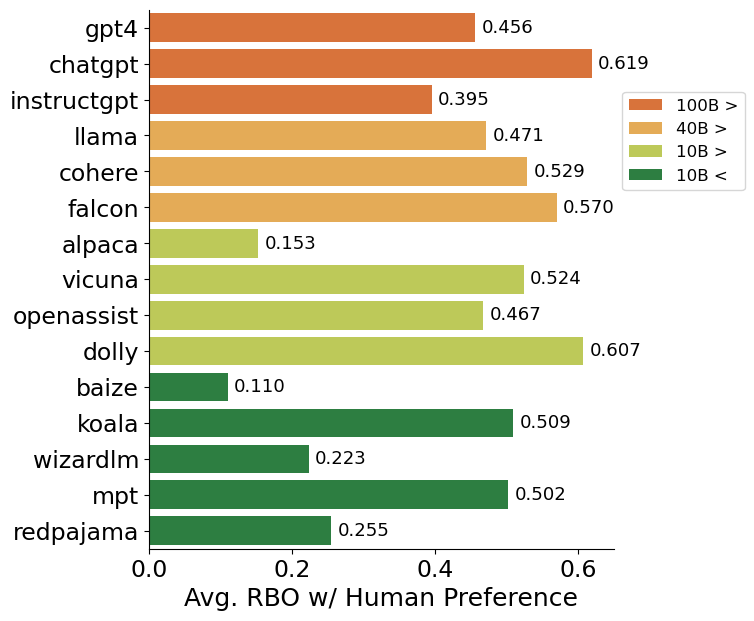

In [61]:
model_names = list(position_rbo_human_machine.keys())
avg_rbo_human_machine = list(position_rbo_human_machine.values())
model_positions = [7, 10, 11, 12, 1, 2, 0, 4, 9, 8, 14, 13, 6, 5, 3]
model_params = ['10B >', '10B <', '10B <', '10B <', '100B >', '100B >', '100B >', '40B >', '10B >', '10B >', '10B <', '10B <', '10B >', '40B >', '40B >']
param_orders = ['100B >', '40B >', '10B >', '10B <']
group_colors = {
    "100B >": '#F26B21',
    "40B >": '#FBB040',
    "10B >": '#CBDB47',
    "10B <": '#208B3A',
}
df = pd.DataFrame(data={'model_names': model_names, 'avg_rbo_human_machine': avg_rbo_human_machine, 'position': model_positions, 'model_param': model_params})
plt.figure(figsize=(6,7))
ax = sns.barplot(x='avg_rbo_human_machine', y='position', data=df, orient='h', hue='model_param',hue_order=param_orders, dodge=False, palette=group_colors)
sns.despine()

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width+0.045,       # set the text at 3 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width), # set variable to display, 2 decimals
            ha = 'center',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment


plt.legend(title='', fontsize=12, bbox_to_anchor= (1,0.65))
plt.tick_params(labelsize=17)
plt.yticks(df['position'], df['model_names'])
# plt.yticks(rotation=45, ha='right')
plt.ylabel('', fontsize=20)
plt.xlabel('Avg. RBO w/ Human Preference', fontsize=18)
# plt.savefig('fig.pdf', format="pdf", bbox_inches="tight")

Find some instances of misalignment

In [62]:
def instance_human_machine_misalign(avg_normalized_human, model_ranked_data, model_name, threshold_common):

    ranking_by_models = []
    for example_dict in model_ranked_data[model_name]:
        sorted_model = sorted(example_dict.keys(), key=lambda key: example_dict[key], reverse=True) # top five models 
        ranking_by_models.append(sorted_model)

    rbo_pairwise = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(avg_normalized_human, ranking_by_models)]

    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)
    with open('examples.json', 'r') as j:
        data_info = json.load(j)

    agg_misalign_data = []
    for i, (a, b) in enumerate(zip(avg_normalized_human, ranking_by_models)):

        model_lst = list(model_info[i].keys())
        system_lst = list(model_info[i].values())

        misalign_data = {}
        human_top5 = a[:5]
        machine_top5 = b[:5]
        misalign_check = any(model in human_top5 for model in machine_top5)

        if misalign_check ==  False: # no common models in human and machine
            print(f"instruction idx: {i}")
            print(f"human top5: {human_top5}")
            print(f"machine top 5: {machine_top5}")
            print(f"--------------------")

            misalign_data['instruction'] = data_info[i]['instruction']
            misalign_data['reference'] = data_info[i]['reference']

            human = {}
            machine = {}

            for model in human_top5:
                corr_system_idx = model_lst.index(model)
                corr_system_name = system_lst[corr_system_idx]
                corr_system_answer = data_info[i][corr_system_name]

                human[model] = corr_system_answer

            for model in machine_top5:
                corr_system_idx = model_lst.index(model)
                corr_system_name = system_lst[corr_system_idx]
                corr_system_answer = data_info[i][corr_system_name]

                machine[model] = corr_system_answer
                

            misalign_data['human_top5'] = human
            misalign_data['machine_top5'] = machine
            misalign_data['avg_rbo_w_human'] = rbo_pairwise[i] # total
            
        else:
            common_models = [model for model in human_top5 if model in machine_top5]
            if len(common_models) < threshold_common:
                print(f"instruction idx: {i}")
                print(f"human top5: {human_top5}")
                print(f"machine top 5: {machine_top5}")
                print(f"--------------------")

                misalign_data['instruction'] = data_info[i]['instruction']
                misalign_data['reference'] = data_info[i]['reference']

                human = {}
                machine = {}

                for model in human_top5:
                    corr_system_idx = model_lst.index(model)
                    corr_system_name = system_lst[corr_system_idx]
                    corr_system_answer = data_info[i][corr_system_name]

                    human[model] = corr_system_answer

                for model in machine_top5:
                    corr_system_idx = model_lst.index(model)
                    corr_system_name = system_lst[corr_system_idx]
                    corr_system_answer = data_info[i][corr_system_name]

                    machine[model] = corr_system_answer
                    

                misalign_data['human_top5'] = human
                misalign_data['machine_top5'] = machine
                misalign_data['avg_rbo_w_human'] = rbo_pairwise[i] # total

                agg_misalign_data.append(misalign_data)

    with open('misalign_instances_{}.json'.format(model_name), 'w') as k:
        json.dump(agg_misalign_data, k, indent=4)

In [63]:
instance_human_machine_misalign(avg_normalized_human, model_rank_data, 'mpt', 2)

instruction idx: 27
human top5: ['baize', 'vicuna', 'gpt4', 'chatgpt', 'wizardlm']
machine top 5: ['dolly', 'openassist', 'redpajama', 'falcon', 'chatgpt']
--------------------
instruction idx: 37
human top5: ['baize', 'chatgpt', 'cohere', 'gpt4', 'instructgpt']
machine top 5: ['koala', 'alpaca', 'dolly', 'chatgpt', 'mpt']
--------------------


In [64]:
def instance_human_ranking(avg_normalized_human): # For Jong Inn's Webpage

    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)
    with open('examples.json', 'r') as j:
        data_info = json.load(j)

    agg_human_data = []
    for i, a in enumerate(avg_normalized_human):

        model_lst = list(model_info[i].keys())
        system_lst = list(model_info[i].values())

        example_data = {}

        example_data['instruction'] = data_info[i]['instruction']
        example_data['reference'] = data_info[i]['reference']

        for model in a:
            corr_system_idx = model_lst.index(model)
            corr_system_name = system_lst[corr_system_idx]
            corr_system_answer = data_info[i][corr_system_name]

            example_data[model] = corr_system_answer
        
        agg_human_data.append(example_data)

    with open('normalized_human_ranking.json', 'w') as k:
        json.dump(agg_human_data, k, indent=4)

In [65]:
instance_human_ranking(avg_normalized_human)

# 3. Bias correlation

In [66]:
bias_types = ['bandwagon', 'compassion', 'distraction', 'frequency', 'order', 'salience', 'selective']
model_names = ['alpaca', 'baize', 'chatgpt', 'cohere', 'falcon', 'gpt4', 'dolly', 'instructgpt', 'koala', 'llama', 'mpt', 'openassist', 'redpajama', 'vicuna', 'wizardlm']

In [67]:
def correct_preferences_format(bias_types): 
    for bias in bias_types: # for each bias folder path
        # formatting to be readable with json.load()
        bias_path = 'bias/' + bias 
        for model_json in os.listdir(bias_path): 
            if model_json.endswith('.json'):
                file_path = os.path.join(bias_path, model_json)
                with open(file_path, 'r') as file:
                    json_string = file.read()
                if json_string.startswith('['):
                    pass
                else:
                    formatted_json = "[" + re.sub(r'}\s*{', '},{', json_string) + "]"
                with open(file_path, 'w') as write:
                    write.write(formatted_json)                    

In [68]:
# correct_preferences_format(bias_types)

### Comparing biases within same model outputs

In [69]:
available_models = ['chatgpt', 'cohere', 'gpt4', 'instructgpt']
model_bias_data = {}
for model in available_models:
    print('loading the model {}'.format(model))
    bias_rank_data = {}
    for bias in bias_types:
        bias_path = 'bias/' + bias 
        if len(os.listdir(bias_path)) != 0:
            with open('bias/{}/nC2_preferences_{}.json'.format(bias, model), 'r') as f:
                data = json.load(f)
            bias_rank_data[bias] = data

    model_bias_data[model] = bias_rank_data

loading the model chatgpt


FileNotFoundError: [Errno 2] No such file or directory: 'bias/bandwagon'

In [ ]:
for model, _ in model_bias_data.items():
    print(f"Model Name: {model}")
    bias_collection = model_bias_data[model]
    bias_rbo_matrix = np.zeros((6, 6)) # all biases except salience
    agg_model_data = []
    # for each model there will be six biases
    for bias, _ in bias_collection.items():
        bias_values = bias_collection[bias] # [{}, ..., {}]
        biases_top5 = []
        for example_dict in bias_values:
            sorted_rank_top5 = sorted(example_dict.keys(), key=lambda key:example_dict[key], reverse=True)[:5] # top 5 choices
            biases_top5.append(sorted_rank_top5)
        agg_model_data.append(biases_top5) # store each bias' top 5 choices

    # Compute rbo between biases under the same model 
    for i in range(bias_rbo_matrix.shape[0]):
        for j in range(i+1, bias_rbo_matrix.shape[1]):
            bias_i = agg_model_data[i]
            bias_j = agg_model_data[j]
            rbo_score = [rbo.RankingSimilarity(a,b).rbo() for a, b in zip(bias_i, bias_j)]
            avg_rbo = round(sum(rbo_score)/len(rbo_score), 3)
            bias_rbo_matrix[i, j] = avg_rbo 

    print("rbo matrix: ")
    print(bias_rbo_matrix)
    print('-----------------------------')

Model Name: chatgpt
rbo matrix: 
[[1.    0.281 0.286 0.285 0.285 0.296]
 [0.    1.    0.492 0.482 0.614 0.536]
 [0.    0.    1.    0.492 0.501 0.495]
 [0.    0.    0.    1.    0.439 0.526]
 [0.    0.    0.    0.    1.    0.518]
 [0.    0.    0.    0.    0.    1.   ]]
-----------------------------
Model Name: cohere
rbo matrix: 
[[1.    0.319 0.403 0.425 0.367 0.315]
 [0.    1.    0.413 0.368 0.317 0.304]
 [0.    0.    1.    0.502 0.434 0.411]
 [0.    0.    0.    1.    0.42  0.371]
 [0.    0.    0.    0.    1.    0.324]
 [0.    0.    0.    0.    0.    1.   ]]
-----------------------------
Model Name: gpt4
rbo matrix: 
[[1.    0.72  0.779 0.67  0.764 0.757]
 [0.    1.    0.716 0.679 0.76  0.735]
 [0.    0.    1.    0.722 0.759 0.762]
 [0.    0.    0.    1.    0.666 0.667]
 [0.    0.    0.    0.    1.    0.737]
 [0.    0.    0.    0.    0.    1.   ]]
-----------------------------
Model Name: instructgpt
rbo matrix: 
[[1.    0.231 0.35  0.314 0.308 0.322]
 [0.    1.    0.271 0.137 0.355 0.

### Comparing models under the same bias

In [ ]:
bias_rank_data = {}
for bias in bias_types:
    print('loading {}'.format(bias))
    bias_path = 'bias/' + bias
    if len(os.listdir(bias_path)) != 0: 
        model_rank_data = {}
        model_names = ['chatgpt', 'cohere', 'gpt4', 'instructgpt'] 
        for model in model_names:
            with open('bias/{}/nC2_preferences_{}.json'.format(bias, model), 'r') as f:
                data = json.load(f)
            model_rank_data[model] = data

        bias_rank_data[bias] = model_rank_data

loading bandwagon
loading compassion
loading distraction
loading frequency
loading order
loading salience
loading selective


In [ ]:
for bias, _ in bias_rank_data.items():
    print(f"Bias type: {bias}")
    model_collection = bias_rank_data[bias]
    model_rbo_matrix = np.zeros((4, 4)) # all four models (selected)
    agg_bias_data = []
    # for each bias dict there will be four model keys
    for model, _ in model_collection.items():
        model_values = model_collection[model] # [{}, ..., {}]
        models_top5 = []
        for example_dict in model_values:
            sorted_rank_top5 = sorted(example_dict.keys(), key=lambda key:example_dict[key], reverse=True)[:5] # top 5 choices
            models_top5.append(sorted_rank_top5)
        agg_bias_data.append(models_top5) # store each bias' top 5 choices

    # Compute rbo between biases under the same model 
    for i in range(model_rbo_matrix.shape[0]):
        for j in range(i+1, model_rbo_matrix.shape[1]):
            model_i = agg_bias_data[i]
            model_j = agg_bias_data[j]
            rbo_score = [rbo.RankingSimilarity(a,b).rbo() for a, b in zip(model_i, model_j)]
            avg_rbo = round(sum(rbo_score)/len(rbo_score), 3)
            model_rbo_matrix[i, j] = avg_rbo 

    print("rbo matrix: ")
    print(model_rbo_matrix)
    print('-----------------------------')

Bias type: bandwagon
rbo matrix: 
[[1.    0.266 0.302 0.674]
 [0.    1.    0.399 0.301]
 [0.    0.    1.    0.358]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: compassion
rbo matrix: 
[[1.    0.391 0.46  0.286]
 [0.    1.    0.336 0.349]
 [0.    0.    1.    0.274]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: distraction
rbo matrix: 
[[1.    0.437 0.513 0.46 ]
 [0.    1.    0.436 0.433]
 [0.    0.    1.    0.447]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: frequency
rbo matrix: 
[[1.    0.387 0.519 0.299]
 [0.    1.    0.417 0.433]
 [0.    0.    1.    0.245]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: order
rbo matrix: 
[[1.    0.476 0.488 0.389]
 [0.    1.    0.407 0.364]
 [0.    0.    1.    0.377]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: selective
rbo matrix: 
[[1.    0.355 0.491 0.391]
 [0.    1.    0.356 0.333]
 [0.    0.    1.    0.408]
 [0.    0.    0.    1

In [ ]:
agg_bias_data['bandwagon']

TypeError: list indices must be integers or slices, not str

In [ ]:
agg_bias_data['compassion']

[['gpt4',
  'cohere',
  'alpaca',
  'wizardlm',
  'falcon',
  'instructgpt',
  'koala',
  'dolly',
  'mpt',
  'chatgpt',
  'redpajama',
  'llama',
  'baize',
  'openassist',
  'vicuna'],
 ['gpt4',
  'cohere',
  'vicuna',
  'koala',
  'instructgpt',
  'chatgpt',
  'falcon',
  'openassist',
  'wizardlm',
  'redpajama',
  'dolly',
  'alpaca',
  'mpt',
  'baize',
  'llama'],
 ['gpt4',
  'cohere',
  'falcon',
  'chatgpt',
  'koala',
  'baize',
  'instructgpt',
  'wizardlm',
  'vicuna',
  'openassist',
  'llama',
  'mpt',
  'redpajama',
  'alpaca',
  'dolly'],
 ['gpt4',
  'cohere',
  'chatgpt',
  'llama',
  'falcon',
  'alpaca',
  'openassist',
  'koala',
  'mpt',
  'vicuna',
  'wizardlm',
  'baize',
  'instructgpt',
  'dolly',
  'redpajama'],
 ['cohere',
  'alpaca',
  'gpt4',
  'baize',
  'instructgpt',
  'wizardlm',
  'dolly',
  'vicuna',
  'koala',
  'chatgpt',
  'falcon',
  'openassist',
  'llama',
  'mpt',
  'redpajama'],
 ['cohere',
  'gpt4',
  'chatgpt',
  'falcon',
  'instructgpt',
 

In [ ]:
model_names = ['baize', 'chatgpt', 'cohere', 'gpt4', 'instructgpt', 'openassist'] 
agg_bias_rbo_matrix = np.zeros((len(bias_types), len(bias_types)))

bias_types = list(agg_bias_data.keys())

for bias_x in bias_types:
    bias_x_idx = bias_types.index(bias_x)
    print('x: ', bias_x)
    bias_x_data = agg_bias_data[bias_x]
    for bias_y_idx in range(bias_x_idx, len(bias_types)):
        bias_y_key = bias_types[bias_y_idx]
        print('y: ', bias_y_key)
        bias_y_data = agg_bias_data[bias_y_key]

        # calculate rbo scores
        rbo_score = []
        for i in range(50):
            print('i: ', i)
            rb = rbo.RankingSimilarity(bias_x_data[i], bias_y_data[i]).rbo()
            rbo_score.append(rb)

        avg_rbo_whole = round(sum(rbo_score)/len(rbo_score), 3)
        agg_bias_rbo_matrix[bias_x_idx, bias_y_idx] = avg_rbo_whole
    
        print('--------------')

agg_bias_rbo_matrix

x:  bandwagon
y:  bandwagon
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
--------------
y:  compassion
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
--------------
y:  distraction
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i: 

array([[1.   , 0.733, 0.787, 0.775, 0.768, 0.786, 0.   ],
       [0.   , 1.   , 0.776, 0.775, 0.764, 0.765, 0.   ],
       [0.   , 0.   , 1.   , 0.847, 0.843, 0.839, 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.831, 0.834, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.834, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

optional help.py

In [ ]:
def check_answer_for_qualify(df, num_examples=5):
    
    qualified_worker_id = {}
    for worker in range(df.shape[0]):
        each_parsed_answers = parse_amt_answers(df['Answer.taskAnswers'][worker]) # a list of all dictionary example answers
        status = True
        # (1) if answered all examples 
        if len(each_parsed_answers) != num_examples:
            status = False
        # (2) if didn't move anything
        for answer in each_parsed_answers:
            if answer != None:
                if None not in answer['ranking']:
                    status = False
            else:
                status=False
        # # (3) Threshold check
        # if each_parsed_answers[0]['methods'].index('black-bar') != 3:
        #     status = False
        # elif each_parsed_answers[1]['methods'].index('black-bar') != 2:
        #     status = False 
        # elif (each_parsed_answers[2]['methods'].index('black-bar') != 1) & (each_parsed_answers[2]['methods'].index('System D') != 0):
        #     status = False
        # elif each_parsed_answers[3]['methods'].index('black-bar') != 1:
        #     status = False 
        # elif each_parsed_answers[4]['methods'].index('black-bar') != 3:
        #     status = False
        
        # For the answers who passed all requirements, 
        if status == True:
            # qualified_worker_id.append(df['WorkerId'][worker])
            qualified_worker_id[worker] = each_parsed_answers
           

    return qualified_worker_id

In [ ]:
def extracted_data_by_example(A):
    # Initialize empty lists to store the data
    data = []

    # Iterate through the dictionary to extract data
    for annotator, annotations in A.items():
        for annotation in annotations:
            example_index = annotation['exampleIndex']
            methods = annotation['methods']
            data.append([annotator, example_index] + methods)

    # Create a Pandas DataFrame
    columns = ['Annotator', 'ExampleIndex'] + [f'Method_{i+1}' for i in range(16)]
    df = pd.DataFrame(data, columns=columns)

    # Display the DataFrame
    df_d = df.groupby('ExampleIndex').apply(lambda x: x.drop('ExampleIndex', axis=1))
    return df_d

def extracted_data_by_annotator(A):
    # Initialize empty lists to store the data
    data = []

    # Iterate through the dictionary to extract data
    for annotator, annotations in A.items():
        for annotation in annotations:
            example_index = annotation['exampleIndex']
            methods = annotation['methods']
            data.append([annotator, example_index] + methods)

    # Create a Pandas DataFrame
    columns = ['Annotator', 'ExampleIndex'] + [f'Method_{i+1}' for i in range(16)]
    df = pd.DataFrame(data, columns=columns)
    
    return df